# Import libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') 

In [2]:
#  This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
 
%matplotlib inline

# Import datasets

In [3]:
#define the path of the main folder
path = r'/Users/gil/Downloads/World Happiness'

In [4]:
#import combined_data_checked.csv
df_combined = pd.read_csv(os.path.join(path, 'Data', 'Prepared data', 'combined_data_checked_2.csv'), index_col = False)


### Since my dataset has time-series data, I created a new data frame with the necessary columns, Year and Happiness Score, as these are necessary to create a line chart. 

In [5]:
# Create New DataFrame of Specific column by DataFrame.assign() method.
df_combined_2 = pd.DataFrame().assign(Year=df_combined['Year'], Happiness_score=df_combined['Happiness Score'])
print(df_combined_2)

        Year  Happiness_score
0     2015.0              7.6
1     2015.0              7.6
2     2015.0              7.5
3     2015.0              7.5
4     2015.0              7.4
...      ...              ...
1220  2022.0              3.3
1221  2022.0              2.9
1222  2022.0              2.9
1223  2022.0              2.4
1224     NaN              NaN

[1225 rows x 2 columns]


In [6]:
df_combined_2.columns

Index(['Year', 'Happiness_score'], dtype='object')

In [7]:
type(df_combined_2)

pandas.core.frame.DataFrame

In [8]:
df_combined_2.head(5)

,Year,Happiness_score
0,2015.0,7.6
1,2015.0,7.6
2,2015.0,7.5
3,2015.0,7.5
4,2015.0,7.4


### Make Year the index

In [9]:
df_combined_2 = df_combined_2.set_index('Year')


In [10]:
df_combined_2.head(5)

,Happiness_score
Year,
2015.0,7.6
2015.0,7.6
2015.0,7.5
2015.0,7.5
2015.0,7.4


### My dataset only has a date in the format of just the year. It's also just for the range of 2015-2019. I calculated the average happiness score for each year. 

In [11]:
avg_happiness_score = df_combined_2.groupby('Year')['Happiness_score'].mean()

In [12]:
avg_happiness_score

Year
2015.0    5.385987
2016.0    5.392308
2017.0    5.361039
2018.0    5.383226
2019.0    5.412258
2020.0    5.475163
2021.0    5.534228
2022.0    5.551724
Name: Happiness_score, dtype: float64

In [13]:
result = pd.DataFrame({'Year': avg_happiness_score.index, 'Happiness_score': avg_happiness_score.values})

In [14]:
result

,Year,Happiness_score
0,2015.0,5.385987
1,2016.0,5.392308
2,2017.0,5.361039
3,2018.0,5.383226
4,2019.0,5.412258
5,2020.0,5.475163
6,2021.0,5.534228
7,2022.0,5.551724


In [15]:
result = result.set_index('Year')


In [16]:
result

,Happiness_score
Year,
2015.0,5.385987
2016.0,5.392308
2017.0,5.361039
2018.0,5.383226
2019.0,5.412258
2020.0,5.475163
2021.0,5.534228
2022.0,5.551724


# 4. Create a line chart of your data.b

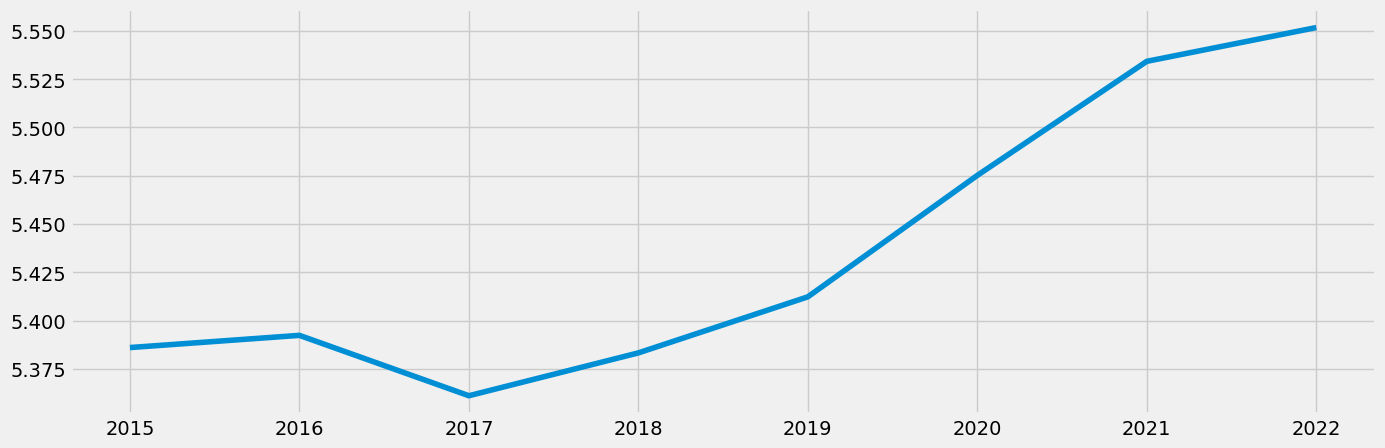

In [17]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(result)

# 5. Decompose the data’s components.

In [18]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(result, model='additive', period=1)

In [19]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

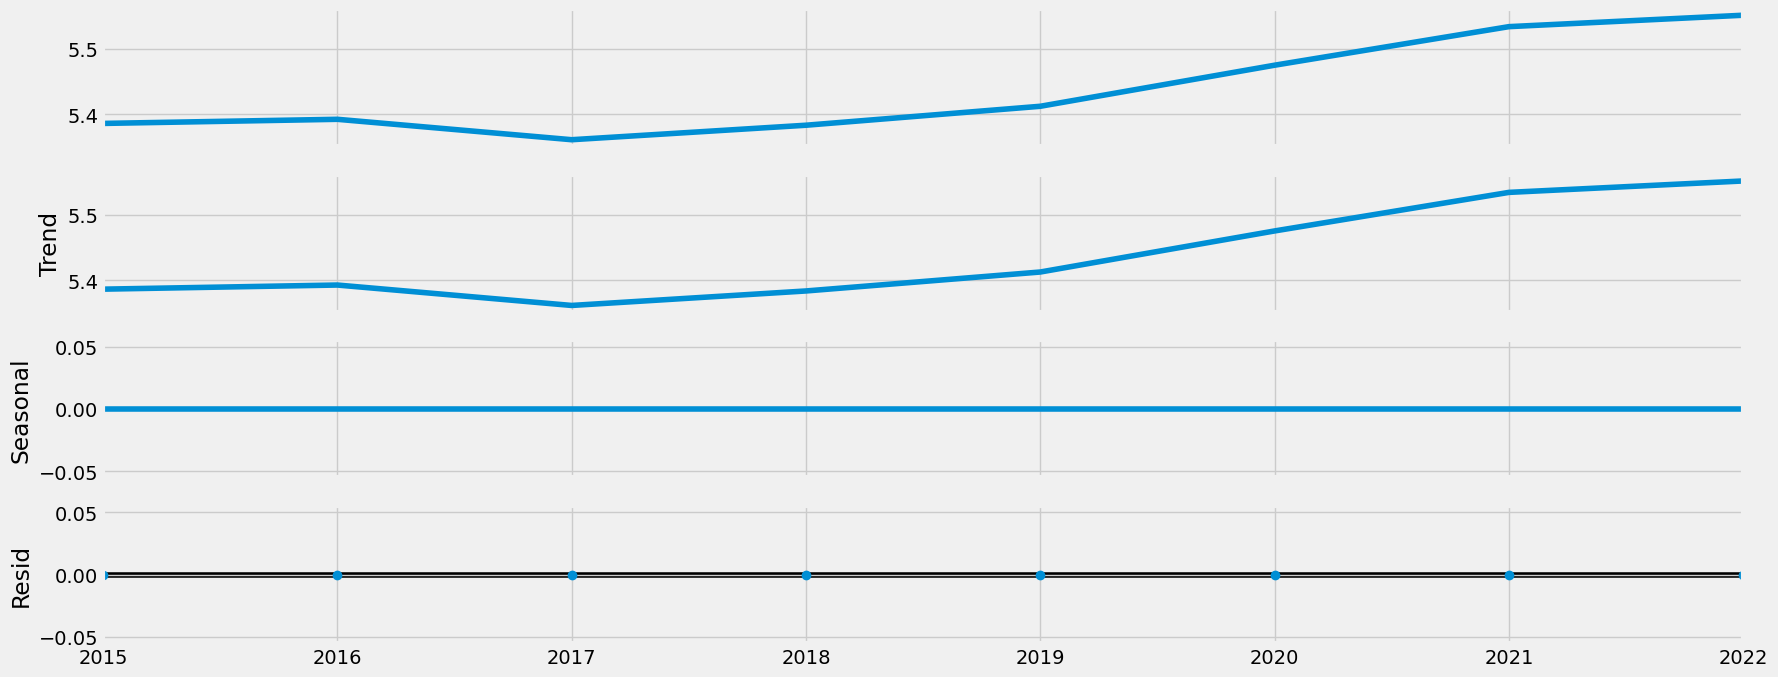

In [20]:
# Plot the separate components

decomposition.plot()
plt.show()

### Becasue we only have 5 observations here (one average Happiness Score for eah year), there is not much going on in this graph. The trend line mimics the line chart, there is no seasonality and no noise. 

# 6. Conduct a Dickey-Fuller test to check for stationarity.


In [21]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(result['Happiness_score'])

Dickey-Fuller Stationarity test:
Test Statistic                -4.890424
p-value                        0.000036
Number of Lags Used            2.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64


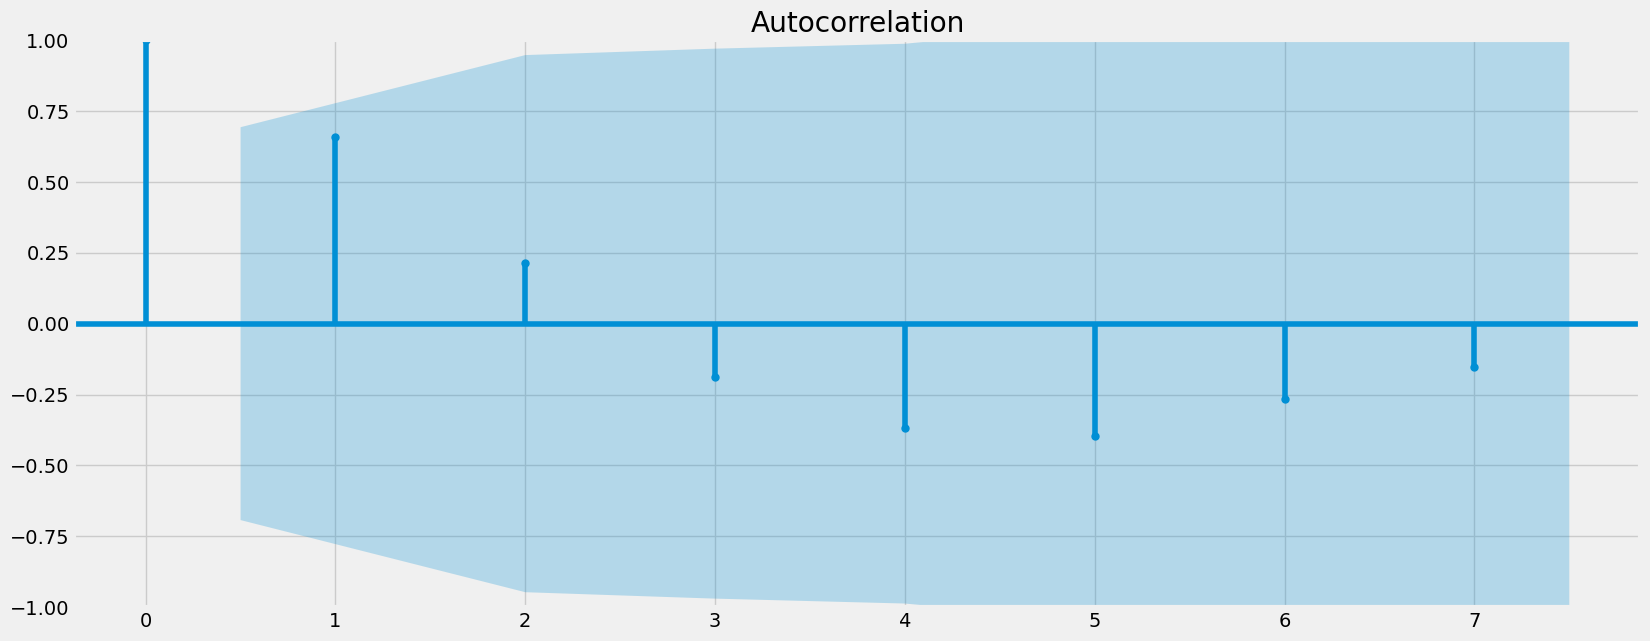

In [22]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(result)
plt.show()

In [23]:
data_diff = result - result.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [24]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 


In [25]:
data_diff.head()

,Happiness_score
Year,
2016.0,0.006320
2017.0,-0.031269
2018.0,0.022187
2019.0,0.029032
2020.0,0.062905


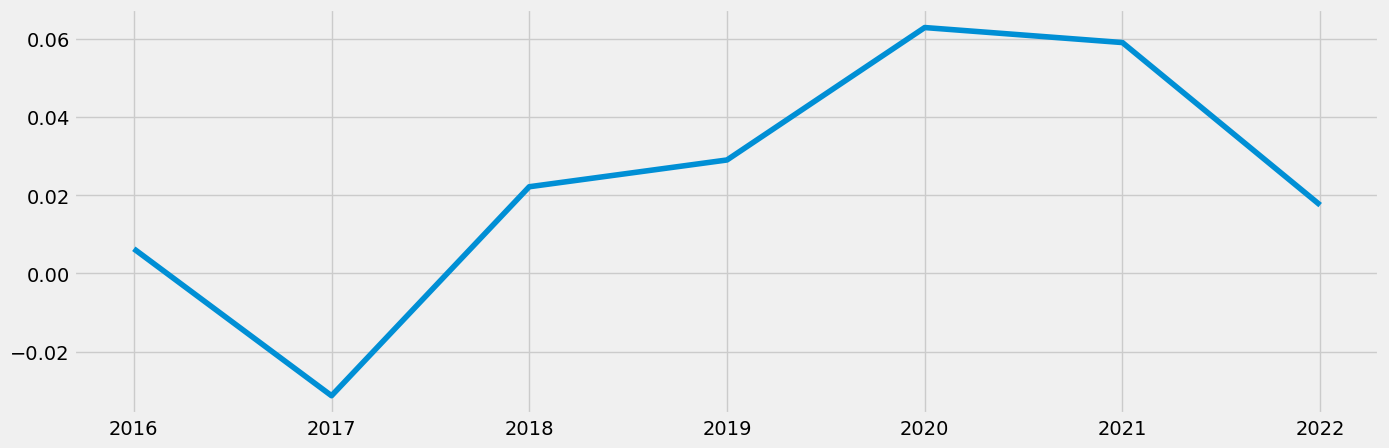

In [26]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [27]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.366777
p-value                        0.598096
Number of Lags Used            0.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


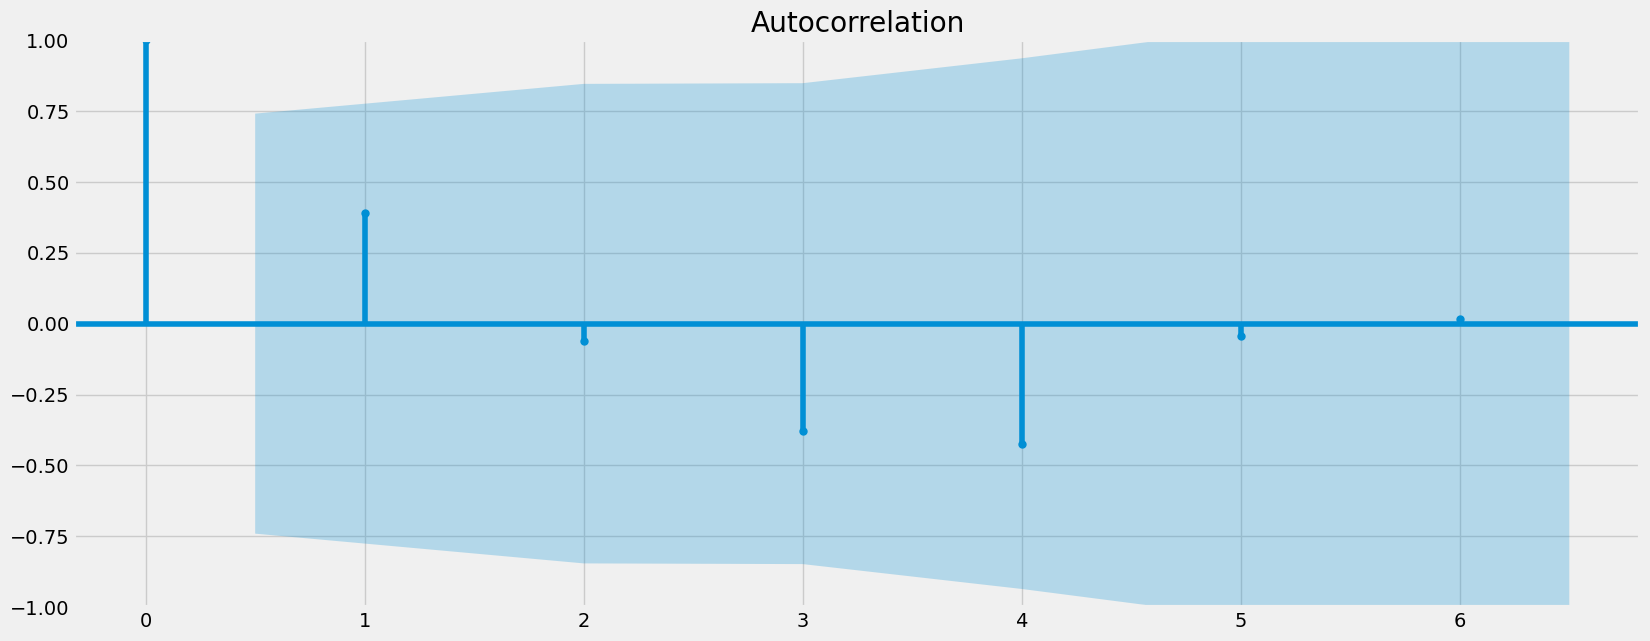

In [28]:
plot_acf(data_diff)
plt.show()

In [29]:
df_combined.to_csv(os.path.join(path, 'Data', 'Prepared data', 'combined_data_checked_2.csv'))